### ANN for regression, example 1, house energy bill estimation

#### Imports / modules

In [2]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers

#### Loading the dataset

In [3]:
# load the csv-file to pandas DataFrame
df = pd.read_csv("Cars Datasets 2025.csv", encoding="latin1")

### After that i need to check the datasets to see if some modification are required

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Company Names              1218 non-null   object
 1   Cars Names                 1218 non-null   object
 2   Engines                    1218 non-null   object
 3   CC/Battery Capacity        1215 non-null   object
 4   HorsePower                 1218 non-null   object
 5   Total Speed                1218 non-null   object
 6   Performance(0 - 100 )KM/H  1212 non-null   object
 7   Cars Prices                1218 non-null   object
 8   Fuel Types                 1218 non-null   object
 9   Seats                      1218 non-null   object
 10  Torque                     1217 non-null   object
dtypes: object(11)
memory usage: 104.8+ KB


In [5]:
df.isnull().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [6]:
df.isna().sum()

Company Names                0
Cars Names                   0
Engines                      0
CC/Battery Capacity          3
HorsePower                   0
Total Speed                  0
Performance(0 - 100 )KM/H    6
Cars Prices                  0
Fuel Types                   0
Seats                        0
Torque                       1
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.describe(include="object")

,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210,1210
unique,37,1193,350,309,453,113,180,533,21,17,262
top,Nissan,Jetta Hybrid,I4,"2,000 cc",355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,148,2,64,31,23,144,45,36,871,691,72


In [9]:
pd.set_option('display.max_rows', 1000)


In [10]:
df["Performance(0 - 100 )KM/H"].value_counts()

Performance(0 - 100 )KM/H
6.5 sec               45
7.5 sec               43
8.5 sec               40
10.5 sec              38
8.0 sec               34
6.0 sec               31
9.5 sec               31
7.0 sec               26
6.8 sec               20
2.9 sec               20
4.5 sec               20
10.0 sec              19
9.0 sec               18
11.0 sec              18
12.0 sec              17
5.1 sec               17
5.7 sec               16
6.6 sec               16
7.8 sec               15
5.5 sec               14
4.8 sec               14
10.2 sec              14
5.6 sec               13
12.5 sec              13
7.4 sec               13
3.0 sec               13
6.7 sec               13
6.9 sec               13
8.2 sec               12
5.0 sec               12
7.6 sec               12
5.9 sec               12
5.2 sec               12
7.3 sec               12
5.4 sec               11
15.0 sec              11
6.2 sec               11
3.9 sec               11
2.8 sec               11

### There is a few messy values(eg. 5.0 - 6.5 sec, 6.5 - 7.0 sec ect) in the dataset and with very low cardinality(1) so i decided to manage the column and ignore these values keeping only the typical ones


In [11]:
col = "Performance(0 - 100 )KM/H"
df = df[df[col].astype(str).str.match(r"^\d+(\.\d+)?\s*sec$")]

df[col] = df[col].str.replace(" sec", "").astype(float)

print(df[col].value_counts())

Performance(0 - 100 )KM/H
6.5     45
7.5     43
8.5     40
10.5    38
8.0     35
6.0     32
9.5     31
7.0     26
11.0    21
10.0    21
4.5     20
2.9     20
12.0    20
6.8     20
9.0     19
5.1     17
6.6     16
5.7     16
7.8     15
4.8     14
10.2    14
5.5     14
15.0    14
6.9     13
6.7     13
5.6     13
12.5    13
3.0     13
7.4     13
5.9     12
7.6     12
5.0     12
13.0    12
7.3     12
8.2     12
5.2     12
6.2     11
11.5    11
2.8     11
3.9     11
5.4     11
3.6     11
4.4     10
4.9     10
7.1      9
6.3      9
3.5      9
3.4      9
8.4      9
9.2      9
7.9      8
7.2      8
5.8      8
3.3      8
5.3      8
8.6      8
14.0     8
4.0      7
3.2      7
2.5      7
4.1      7
6.4      7
16.0     7
8.8      7
9.6      7
9.8      7
4.2      7
4.3      7
8.9      7
4.7      7
9.4      7
6.1      7
12.2     6
3.1      6
11.2     6
7.7      6
9.3      6
13.5     6
2.4      5
10.3     5
8.1      5
8.3      5
3.7      4
10.9     4
10.8     4
10.7     4
15.5     4
3.8      3
10.4  

In [12]:
df["Torque"].value_counts()

Torque
400 Nm               69
250 Nm               56
350 Nm               39
500 Nm               31
450 Nm               25
519 Nm               22
600 Nm               20
560 Nm               19
300 Nm               19
200 Nm               18
624 Nm               17
850 Nm               16
360 Nm               16
320 Nm               15
366 Nm               14
900 Nm               13
260 Nm               13
310 Nm               12
275 Nm               12
355 Nm               12
140 Nm               11
180 Nm               11
230 Nm               11
160 Nm               11
270 Nm               11
430 Nm               11
700 Nm               10
179 Nm               10
1600 Nm              10
750 Nm               10
264 Nm               10
280 Nm               10
800 Nm                9
240 Nm                9
362 Nm                9
650 Nm                9
420 Nm                9
170 Nm                9
265 Nm                9
520 Nm                9
629 Nm                8
583 Nm   

### Here's the same we can see that some data are not in a way we want so same process

In [13]:
col = "Torque"
df = df[df[col].astype(str).str.match(r"^\d+(\.\d+)?\s*Nm$")]

df[col] = df[col].str.replace(" Nm", "").astype(int)

print(df[col].value_counts())

Torque
400     69
250     56
350     39
500     31
450     25
519     22
600     20
300     19
560     19
200     18
624     17
360     16
850     16
320     15
366     14
900     13
260     13
310     12
355     12
275     12
230     11
270     11
430     11
160     11
140     11
180     11
750     10
280     10
700     10
264     10
1600    10
179     10
420      9
650      9
800      9
520      9
170      9
240      9
265      9
362      9
637      8
870      8
113      8
245      8
210      8
629      8
583      8
150      7
720      7
220      7
330      7
475      7
570      7
205      7
145      6
550      6
353      6
620      6
340      6
135      6
380      6
130      6
197      6
100      6
352      6
480      6
1234     5
770      5
630      5
151      5
365      5
696      5
580      4
290      4
441      4
680      4
760      4
252      4
154      4
335      4
690      4
305      3
370      3
652      3
385      3
470      3
373      3
666      3
413      3
142      3
840

### And Again...

In [14]:
df["Cars Prices"].value_counts()

Cars Prices
$35,000                    36
$30,000                    32
$50,000                    31
$55,000                    29
$25,000                    28
$45,000                    28
$40,000                    27
$60,000                    22
$28,000                    22
$70,000                    17
$20,000                    15
$18,000                    15
$85,000                    14
$32,000                    13
$22,000                    12
$38,000                    11
$20,000 - $25,000          10
$25,000 - $30,000           9
$36,000                     9
$42,000                     9
$30,000 - $35,000           9
$52,000                     9
$33,000                     8
$27,000                     8
$65,000                     8
$23,000                     7
$15,000                     7
$35,000 - $40,000           7
$18,000 - $22,000           7
$48,000                     7
$44,000                     7
$75,000                     7
$15,000 - $18,000           

In [15]:


col = "Cars Prices"

# Keep only entries that do NOT contain "-" (ignore ranges)
df_clean = df[(df[col].astype(str).str.len() < 13) & (df[col].astype(str).str.len() >1) ]
df_clean = df_clean[~df[col].astype(str).str.contains("-")]
df_clean = df_clean[~df[col].astype(str).str.contains("\x96")]

# Remove $ and commas, convert to numeric
df_clean[col] = df_clean[col].str.replace("$", "").str.replace(",", "").astype(float)
df_clean.head()
df_clean[col].value_counts()



C:\Users\Administrateur\AppData\Local\Temp\ipykernel_20584\2393276654.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~df[col].astype(str).str.contains("-")]
C:\Users\Administrateur\AppData\Local\Temp\ipykernel_20584\2393276654.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean = df_clean[~df[col].astype(str).str.contains("\x96")]


Cars Prices
35000.0       36
30000.0       32
50000.0       31
55000.0       29
45000.0       28
25000.0       28
40000.0       27
28000.0       22
60000.0       22
70000.0       17
20000.0       15
18000.0       15
85000.0       14
32000.0       13
22000.0       12
38000.0       11
52000.0        9
36000.0        9
42000.0        9
27000.0        8
33000.0        8
65000.0        8
75000.0        7
44000.0        7
15000.0        7
23000.0        7
48000.0        7
95000.0        6
90000.0        6
47000.0        5
29000.0        5
39000.0        5
80000.0        5
37000.0        5
31000.0        5
62000.0        5
12000.0        5
46000.0        5
49000.0        4
19000.0        4
24000.0        4
14500.0        4
110000.0       4
120000.0       4
53000.0        4
18500.0        4
100000.0       4
1100000.0      4
22500.0        4
58000.0        4
26000.0        4
220000.0       3
28500.0        3
157000.0       3
170000.0       3
18400.0        3
3300000.0      3
78000.0        3
14

In [16]:
df["Seats"].value_counts()

Seats
5       640
7       146
4       132
2       120
8        28
6        18
3        14
2+2       5
1         3
12        1
9         1
215      1
27       1
78       1
29       1
212      1
Name: count, dtype: int64

In [17]:
df = df[df["Seats"].astype(str).str.isdigit()]
df["Seats"] = df["Seats"].astype(int)
df = df[df["Seats"].between(1, 20)]

### Here now we can see the data in new columns with their new shape and without odd values

In [18]:
data = pd.DataFrame()
data["Total Speed in km/h"] = df["Total Speed"].str.extract(r"([0-9]+)")
data["Total Speed in km/h"] = data["Total Speed in km/h"].astype(float)
data["CC/Battery Capacity in cc"] =  df["CC/Battery Capacity"].str.extract(r"([0-9]+)")
data["CC/Battery Capacity in cc"] = data["CC/Battery Capacity in cc"].astype(float)

data["HorsePower"] =  df["HorsePower"].str.extract(r"([0-9]+)")
data["HorsePower"] = data["HorsePower"].astype(float)

data["Seats"] = df["Seats"]
data["Performance(0 - 100 )KM/H"] = df["Performance(0 - 100 )KM/H"]
data["Torque"] = df["Torque"]
data["Cars Prices"] = df_clean["Cars Prices"]


# Check the result
print(data.head())
print(df["Seats"].value_counts())


   Total Speed in km/h  CC/Battery Capacity in cc  HorsePower  Seats  \
0                340.0                     3990.0       963.0      2   
1                250.0                     6749.0       563.0      5   
3                250.0                        3.0       630.0      4   
4                320.0                        5.0       602.0      2   
5                341.0                        3.0       710.0      2   

   Performance(0 - 100 )KM/H  Torque  Cars Prices  
0                        2.5     800    1100000.0  
1                        5.3     900     460000.0  
3                        3.2     900     161000.0  
4                        3.6     560     253290.0  
5                        2.9     770     499000.0  
Seats
5     640
7     146
4     132
2     120
8      28
6      18
3      14
1       3
12      1
9       1
Name: count, dtype: int64


### All that was for the numeric data, we have to do the same for the rest

In [19]:
df = df.drop(columns=['CC/Battery Capacity',	'HorsePower',	'Total Speed',	'Performance(0 - 100 )KM/H',	'Cars Prices', 'Seats',	'Torque'], axis=1)

In [20]:
df.describe()

,Company Names,Cars Names,Engines,Fuel Types
count,1103,1103,1103,1103
unique,37,1092,304,17
top,Nissan,NX Coupe,I4,Petrol
freq,148,2,63,815


In [21]:
df['Fuel Types'].value_counts()

Fuel Types
Petrol                     815
Diesel                      96
Electric                    73
Hybrid                      70
Petrol/Hybrid               14
Petrol/Diesel               11
Plug-in Hybrid               5
Hybrid (Petrol)              4
Petrol, Diesel               3
Hydrogen                     3
Petrol/AWD                   2
Petrol, Hybrid               2
plug in hyrbrid              1
Hybrid/Electric              1
Diesel/Petrol                1
CNG/Petrol                   1
Hybrid (Gas + Electric)      1
Name: count, dtype: int64

In [22]:
len(df["Fuel Types"].unique())

17

In [23]:
# As the cardinality is super big 1094 we will remove the column 
df = df.drop(columns=['Cars Names'], axis=1)

### I used ChatGPT to generate the mapping list that i use to replace the columns, i used it because beside some odd tips i find on internet, i didn't know how to clean it well. To check that it was good i just had to compare it to the original columns and check how many data was in there now.

In [24]:
data["Fuel Types"] = df["Fuel Types"].str.strip().str.title()

mapping = {
    "Plug-In Hybrid": "Hybrid",
    "Plug In Hyrbrid": "Hybrid",
    "Hybrid (Petrol)": "Petrol/Hybrid",
    "Hybrid (Gas + Electric)": "Hybrid",
    "Petrol/Hybrid": "Petrol/Hybrid",
    "Petrol/Diesel": "Petrol/Diesel",
    "Petrol, Hybrid" : "Petrol/Hybrid",
    "Petrol, Diesel": "Petrol/Diesel",
    "Hybrid/Electric": "Hybrid/Electric",
    "Diesel/Petrol": "Petrol/Diesel",
    "Cng/Petrol": "CNG/Petrol",
    "Petrol/Awd": "Petrol/AWD",
}


data["Fuel Types"] = data["Fuel Types"].replace(mapping)

print(data["Fuel Types"].value_counts())
len(data["Fuel Types"].unique())


Fuel Types
Petrol             815
Diesel              96
Hybrid              77
Electric            73
Petrol/Hybrid       20
Petrol/Diesel       15
Hydrogen             3
Petrol/AWD           2
Hybrid/Electric      1
CNG/Petrol           1
Name: count, dtype: int64


10

In [25]:
df["Engines"].value_counts()

Engines
I4                                     63
V12                                    51
V6                                     39
Inline-4                               38
V8                                     30
2.0L Inline-4                          20
1.6L Inline-4                          19
Electric Motor                         17
5.6L V8                                17
5.3L V8 Gasoline                       16
2.0L I4 Turbo                          15
Electric                               15
Dual Electric Motors                   15
6.2L V8 Gasoline                       15
2.0L Turbo I4                          14
1.8L Inline-4                          13
3.6L V6 Gasoline                       12
I4 Petrol                              12
I3                                     12
V10                                    11
3.5L V6                                11
2.0L 4-Cylinder                        11
8.0L Quad-Turbo W16                    10
3.0L Twin-Turbo Flat-6    

In [26]:
len(df["Engines"].unique())

304

#### I've tried the CountEncoder function wich for a given categorical feature, replace the names of the groups with the group counts, to clean this part and get rid of all the mapping but it was messing with my cardinality so i kept the mapping for the Fuel and Engines columns but i managed to clean the company one without mapping

In [27]:
data["Engines"] = df["Engines"].str.strip().str.title()
engine_mapping = {
    # --- Électrique & Hybride ---
    "Electric": "Electric",
    "Electric (Dual Motor)": "Electric",
    "Single Electric Motor": "Electric",
    "Single Electric Motor (Rwd)": "Electric",
    "Dual Electric Motors (Awd)": "Electric",
    "Electric Awd": "Electric",
    
    "Hybrid": "Hybrid",
    "Hybrid I4 + Electric Motor": "Hybrid",
    "I4 / Electric": "Hybrid",
    "Plug-in Hybrid": "Hybrid",
    "Plug-In Hybrid (1.4L I4 Turbo)": "Hybrid",
    "Plug-In Hybrid (0.8L I2 Diesel)": "Hybrid",
    "Plug-In Hybrid / Diesel I4": "Hybrid",
    "Twin-Turbo V6 Hybrid": "Hybrid",
    "V6 Hybrid": "Hybrid",
    "V6 Hybrid + Electric Motor": "Hybrid",
    "I4 Hybrid": "Hybrid",
    "1.6L 4-Cylinder Hybrid": "Hybrid",
    "2.0L Inline-4 Hybrid": "Hybrid",
    "2.5L Inline-4 Hybrid": "Hybrid",
    "Hybrid (Gas + Electric)": "Hybrid",
    "Hydrogen Fuel Cell,Electric Motor": "Hydrogen",

    # --- 3 cylindres ---
    "I3": "I3",
    "0.7L 3-Cylinder": "I3",
    "660Cc Inline-3": "I3",
    "657Cc Turbocharged Inline-3": "I3",
    "0.66L Inline-3": "I3",
    "1.0L Inline-3": "I3",
    "1.0L Turbocharged Inline-3": "I3",
    "Turbocharged Inline-3": "I3",

    # --- 4 cylindres ---
    "I4": "I4",
    "Inline-4": "I4",
    "2.0L Inline-4": "I4",
    "1.6L Inline-4": "I4",
    "1.8L Inline-4": "I4",
    "2.5L Inline-4": "I4",
    "2.0L I4 Turbo": "I4",
    "2.0L Turbo I4": "I4",
    "I4 Petrol": "I4",
    "I4 Turbocharged": "I4",
    "Inline-4 Turbocharged": "I4",
    "2.0L 4-Cylinder": "I4",
    "1.6L 4-Cylinder": "I4",

    # --- 6 cylindres ---
    "I6": "I6",
    "3.0L Inline-6": "I6",
    "4.0L Inline-6": "I6",
    "4.8L Inline-6": "I6",
    "2.8L Inline-6": "I6",
    "V6": "V6",
    "3.6L V6": "V6",
    "3.5L V6": "V6",
    "2.9L V6": "V6",
    "3.8L V6": "V6",
    "V6 Petrol": "V6",
    "V6 Ecoboost": "V6",

    # --- 8 cylindres ---
    "V8": "V8",
    "5.6L V8": "V8",
    "5.3L V8": "V8",
    "6.2L V8": "V8",
    "6.4L V8": "V8",
    "5.7L V8": "V8",
    "Naturally Aspirated V8": "V8",
    "Supercharged V8": "V8",

    # --- 10, 12, 16 cylindres ---
    "V10": "V10",
    "V12": "V12",
    "W16": "W16",

    # --- Spéciaux ---
    "Wankel": "Rotary",
    "1.3L Rotary": "Rotary",
    "1.8L Rotary": "Rotary",
    "Wankel Rotary Engine": "Rotary",
    "Boxer-4": "Boxer",
    "Flat-6": "Flat-6",
    "3.0L Twin-Turbo Flat-6": "Flat-6",
    "4.0L Naturally Aspirated Flat-6": "Flat-6",
}
data["Engines"] = data["Engines"].replace(engine_mapping)

print(data["Engines"].value_counts())
len(data["Engines"].unique())

Engines
I4                                     219
V6                                      64
V12                                     51
V8                                      49
Electric                                35
I3                                      28
Hybrid                                  23
Electric Motor                          21
5.3L V8 Gasoline                        16
6.2L V8 Gasoline                        15
Dual Electric Motors                    15
Flat-6                                  14
I6                                      13
3.6L V6 Gasoline                        12
V10                                     11
8.0L Quad-Turbo W16                     10
1.5L Inline-4                            9
1.6L Turbocharged 4-Cylinder             9
2.0L Turbo Inline-4 Gasoline             8
3.0L Twin-Turbo V6                       8
2.9L V6 Twin Turbo                       8
2.0L Diesel I4                           8
3.0L V6                                  8
V8 

255

In [28]:
df.head()

,Company Names,Engines,Fuel Types
0,FERRARI,V8,plug in hyrbrid
1,ROLLS ROYCE,V12,Petrol
3,MERCEDES,V8,Petrol
4,AUDI,V10,Petrol
5,BMW,V8,Petrol


In [29]:
df["Company Names"].value_counts()

Company Names
Nissan               148
Volkswagen           109
Mazda                 86
Chevrolet             58
Peugeot               54
Mitsubishi            54
Kia                   54
GMC                   51
Porsche               47
TOYOTA                42
BMW                   41
Jaguar Land Rover     39
ROLLS ROYCE           29
Ford                  27
Acura                 27
Tata Motors           24
LAMBORGHINI           24
HYUNDAI               22
AUDI                  21
Cadillac              20
MERCEDES              19
Jeep                  19
KIA                   16
ASTON MARTIN          11
Bugatti               10
NISSAN                10
Volvo                  9
HONDA                  7
Tesla                  6
FERRARI                5
VOLVO                  3
MAHINDRA               3
MARUTI SUZUKI          3
Toyota                 2
KIA                    1
BENTLEY                1
ROLLS ROYCE            1
Name: count, dtype: int64

In [30]:
len(df["Company Names"].unique())

37

In [31]:
data["Company Names"] = df["Company Names"].str.strip().str.title()
len(data["Company Names"].unique())


31

In [32]:
# quickly check the first few rows of data
# to see what we have here
df.head()

,Company Names,Engines,Fuel Types
0,FERRARI,V8,plug in hyrbrid
1,ROLLS ROYCE,V12,Petrol
3,MERCEDES,V8,Petrol
4,AUDI,V10,Petrol
5,BMW,V8,Petrol


In [33]:
data.head()

,Total Speed in km/h,CC/Battery Capacity in cc,HorsePower,Seats,Performance(0 - 100 )KM/H,Torque,Cars Prices,Fuel Types,Engines,Company Names
0,340.0,3990.0,963.0,2,2.5,800,1100000.0,Hybrid,V8,Ferrari
1,250.0,6749.0,563.0,5,5.3,900,460000.0,Petrol,V12,Rolls Royce
3,250.0,3.0,630.0,4,3.2,900,161000.0,Petrol,V8,Mercedes
4,320.0,5.0,602.0,2,3.6,560,253290.0,Petrol,V10,Audi
5,341.0,3.0,710.0,2,2.9,770,499000.0,Petrol,V8,Bmw


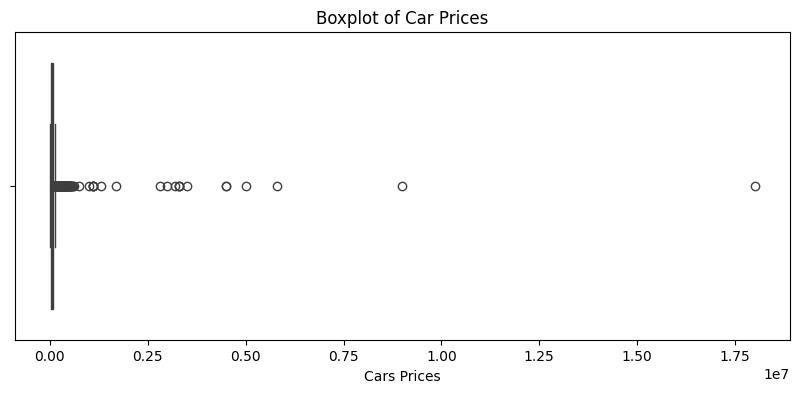

In [34]:

plt.figure(figsize=(10,4))
sns.boxplot(x=data['Cars Prices'])
plt.title('Boxplot of Car Prices')
plt.show()


In [35]:
data=data[data['Cars Prices'] < 600000]

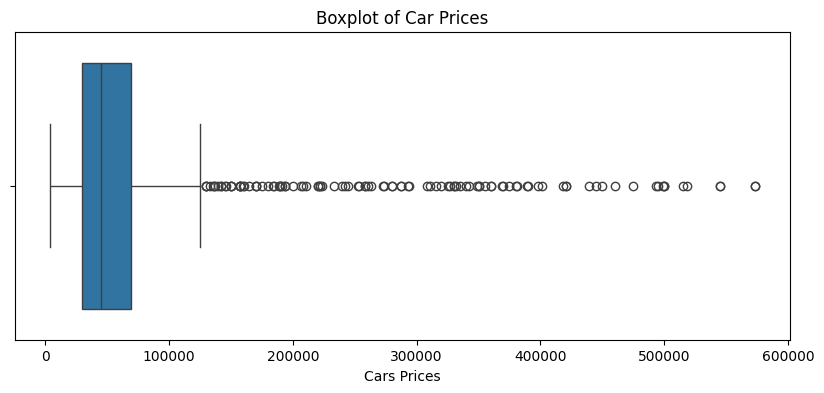

In [36]:
plt.figure(figsize=(10,4))
sns.boxplot(x=data['Cars Prices'])
plt.title('Boxplot of Car Prices')
plt.show()


In [37]:
data['Cars Prices'].describe()

count       937.000000
mean      73178.424760
std       90491.880455
min        4000.000000
25%       30000.000000
50%       45000.000000
75%       69000.000000
max      573000.000000
Name: Cars Prices, dtype: float64

### To transform the categoric variables in values

In [38]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded_cols = encoder.fit_transform(data[["Fuel Types", "Engines", "Company Names"]])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(["Fuel Types", "Engines", "Company Names"]))
data = pd.concat([data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)
data = data.drop(columns=["Fuel Types", "Engines", "Company Names"], axis=1)

In [39]:
print(data.shape)

(937, 251)


In [40]:
data.isna().sum()

Total Speed in km/h                            0
CC/Battery Capacity in cc                      2
HorsePower                                     0
Seats                                          0
Performance(0 - 100 )KM/H                      0
Torque                                         0
Cars Prices                                    0
Fuel Types_CNG/Petrol                          0
Fuel Types_Diesel                              0
Fuel Types_Electric                            0
Fuel Types_Hybrid                              0
Fuel Types_Hybrid/Electric                     0
Fuel Types_Hydrogen                            0
Fuel Types_Petrol                              0
Fuel Types_Petrol/AWD                          0
Fuel Types_Petrol/Diesel                       0
Fuel Types_Petrol/Hybrid                       0
Engines_1.0L I3 Turbo                          0
Engines_1.0L I3 Turbo / 1.5L I4 Turbo          0
Engines_1.0L Turbo I3                          0
Engines_1.0L Turbo I

In [41]:
data.dropna(inplace=True)

In [42]:
data.duplicated().sum()

np.int64(36)

In [43]:
data.drop_duplicates(inplace=True)

In [47]:
data.to_csv("Cars_Cleaned_Dataset_2025.csv", index=False)